<a href="https://colab.research.google.com/github/EA-park/AIFFEL_datathon/blob/pea/%5BDatathon%5D%EC%84%B8%EA%B3%84%ED%96%89%EB%B3%B5%EB%B3%B4%EA%B3%A0%EC%84%9C_%EC%84%B8%EA%B3%84%EC%A0%95%EB%B3%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import sys

import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

경로 설정

In [2]:
from os.path import join
from google.colab import drive

In [3]:
ROOT = '/content/gdrive'
drive.mount(ROOT)

Mounted at /content/gdrive


In [4]:
PROJ = 'MyDrive/AIFFEL/[Datathon] 세계행복보고서'
WORKING_DIR = join(ROOT, PROJ)

#데이터 확인

In [108]:
happiness2015 = pd.read_csv(join(WORKING_DIR, '2015.csv'))
happiness2016 = pd.read_csv(join(WORKING_DIR, '2016.csv'))
happiness2017 = pd.read_csv(join(WORKING_DIR, '2017.csv'))
happiness2018 = pd.read_csv(join(WORKING_DIR, '2018.csv'))
happiness2019 = pd.read_csv(join(WORKING_DIR, '2019.csv'))

###결측치 확인

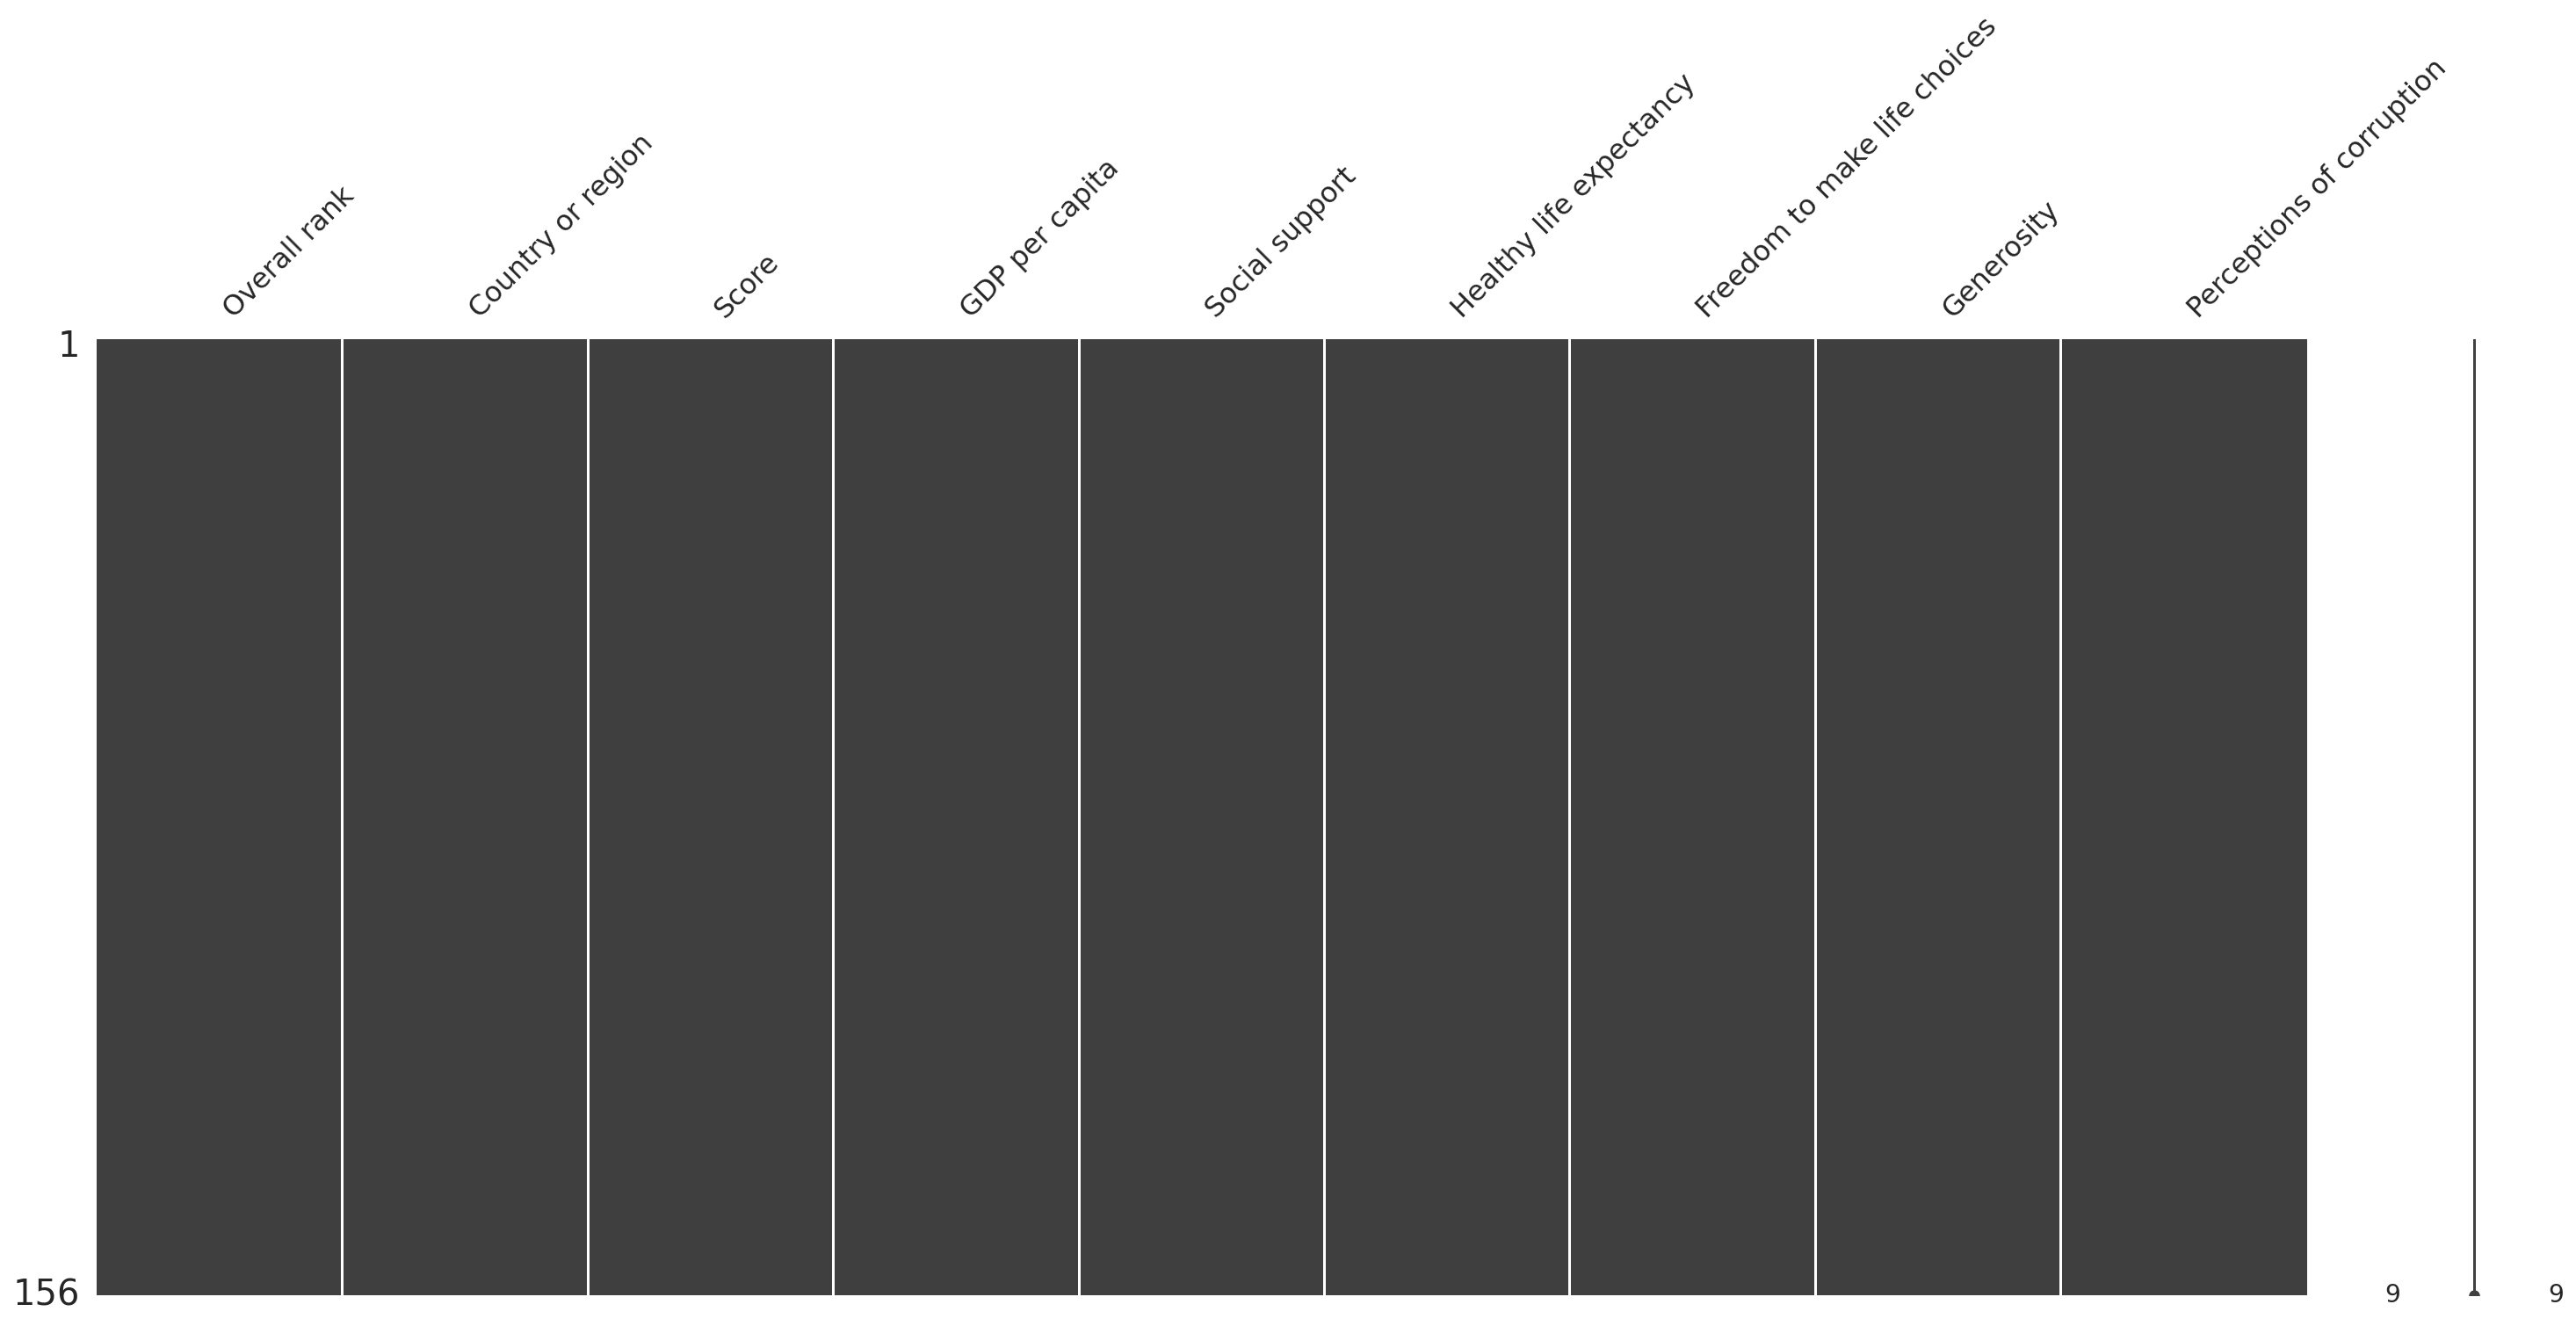

In [109]:
msno.matrix(happiness2019)

목적변수 skewness 확인

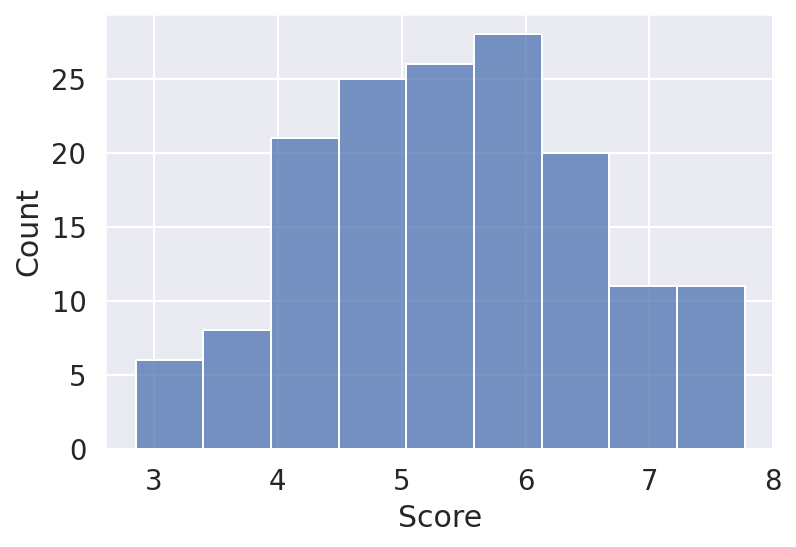

In [122]:
sns.histplot(happiness2019['Score'])
plt.show()

상관분석

['Score' 'Overall rank' 'Social support' 'GDP per capita'
 'Healthy life expectancy' 'Freedom to make life choices'
 'Perceptions of corruption' 'Generosity']


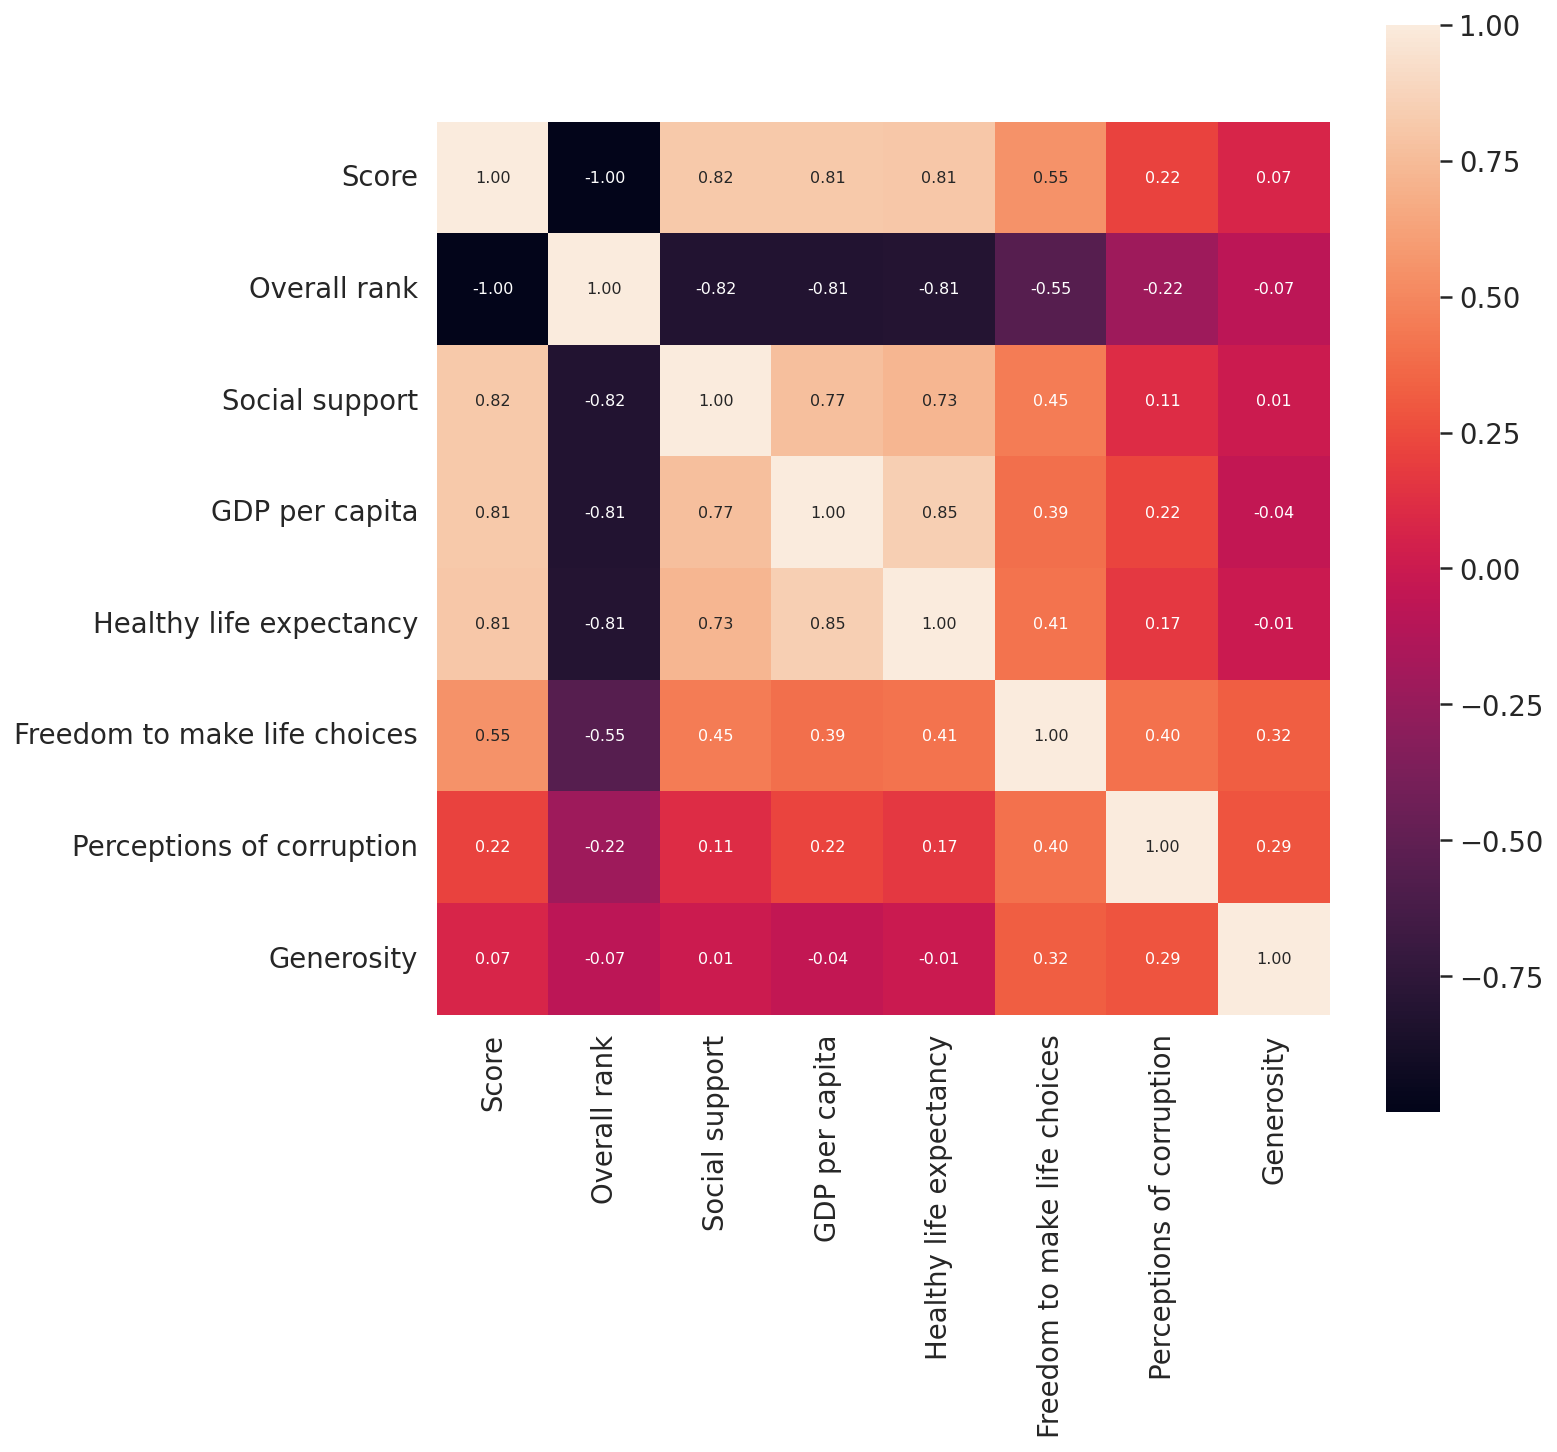

In [111]:
cor_abs = abs(happiness2019.corr(method='spearman'))
cor_cols = cor_abs.nlargest(n=10, columns='Score').index
cor = np.array(sp.stats.spearmanr(happiness2019[cor_cols].values))[0]
print(cor_cols.values)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, square=True, annot_kws={'size' : 8}, xticklabels=cor_cols.values, yticklabels=cor_cols.values)
plt.show()

##한국 데이터 확인

In [112]:
happiness = [happiness2015, happiness2016, happiness2017, happiness2018, happiness2019]

In [113]:
#dataframe 출력 시, 데이터 많을 때 '...'으로 생략하지 않고 전체 다 보여줌
pd.set_option('display.max_columns', None)

2015-2019년 중 한국 데이터 통합
- 피처명 불일치 확인함

In [114]:
korea = happiness2015.loc[happiness2015.Country == 'South Korea']
for i in happiness[1:]:
    try:
        korea = pd.concat([korea, i.loc[i.Country == 'South Korea']], axis=0)
    except AttributeError:
        korea = pd.concat([korea, i.loc[i['Country or region'] == 'South Korea']], axis=0)

korea['Year'] = np.linspace(2015, 2019, 5, dtype=int)
korea.set_index('Year')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,South Korea,Eastern Asia,47.0,5.984,0.04098,1.24461,0.957740,0.96538,0.332080,0.07857,0.185570,2.21978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,South Korea,Eastern Asia,57.0,5.835,NaN,1.35948,0.721940,0.88645,0.251680,0.07716,0.188240,2.35015,5.747,5.923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,South Korea,NaN,NaN,NaN,NaN,NaN,1.128274,NaN,0.257922,NaN,0.206674,NaN,NaN,NaN,55.0,5.838,5.922559,5.753441,1.401678,0.900214,0.063283,1.880378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.175000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,South Korea,5.875,1.266,1.204,0.955,0.244,0.051
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.175000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,South Korea,5.895,1.301,1.219,1.036,0.159,0.056


각 연도별 데이터의 피처명 확인

In [115]:
for i in happiness:
    print(i.keys())

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Fre

피처명 변경
- 참고 : 2017년의 Whisker.low,	Whisker.high는 각각 Lower Confidence Interval	Upper Confidence Interval로 변경했으나, 결과에서 변경이 안 되는 오류 발생함

In [116]:
happiness2015.rename(columns = {'Happiness Rank':'Rank','Happiness Score':'Score', 'Economy (GDP per Capita)':'GDP', 'Family':'Social Support', 'Health (Life Expectancy)':'Healthy Life Expectancy', 'Trust (Government Corruption)':'Corruption'},inplace=True)
happiness2016.rename(columns = {'Happiness Rank':'Rank','Happiness Score':'Score', 'Economy (GDP per Capita)':'GDP', 'Family':'Social Support', 'Health (Life Expectancy)':'Healthy Life Expectancy', 'Trust (Government Corruption)':'Corruption'},inplace=True)
happiness2017.rename(columns = {'Happiness.Rank':'Rank','Happiness.Score':'Score', 'Economy..GDP.per.Capita.':'GDP', 'Family':'Social Support', 'Health..Life.Expectancy.':'Healthy Life Expectancy', 'Trust..Government.Corruption.':'Corruption', 'Dystopia.Residual':'Dystopia Residual', 'Whisker.low':'Lower Confidence Interval', 'Whisker.high':'Upper Confidence Interval'},inplace=True)
happiness2018.rename(columns = {'Country or region':'Country','Overall rank':'Rank', 'GDP per capita':'GDP', 'Freedom to make life choices':'Freedom','Social support':'Social Support', 'Healthy life expectancy':'Healthy Life Expectancy', 'Perceptions of corruption':'Corruption'},inplace=True)
happiness2019.rename(columns = {'Country or region':'Country','Overall rank':'Rank', 'GDP per capita':'GDP', 'Freedom to make life choices':'Freedom','Social support':'Social Support', 'Healthy life expectancy':'Healthy Life Expectancy', 'Perceptions of corruption':'Corruption'},inplace=True)

2015-2019년 중 한국 데이터 통합

In [124]:
korea = happiness2015.loc[happiness2015.Country == 'South Korea']
for i in happiness[1:]:
    korea = pd.concat([korea, i.loc[i.Country == 'South Korea']], axis=0)

korea = korea[['Rank', 'Score', 'GDP', 'Social Support', 'Healthy Life Expectancy', 'Freedom', 'Corruption', 'Generosity', 'Dystopia Residual']]

korea['Year'] = np.linspace(2015, 2019, 5, dtype=int)
korea = korea.set_index('Year')
display(korea)

,Rank,Score,GDP,Social Support,Healthy Life Expectancy,Freedom,Corruption,Generosity,Dystopia Residual
Year,,,,,,,,,
2015,47,5.984,1.244610,0.957740,0.965380,0.332080,0.078570,0.185570,2.219780
2016,57,5.835,1.359480,0.721940,0.886450,0.251680,0.077160,0.188240,2.350150
2017,55,5.838,1.401678,1.128274,0.900214,0.257922,0.063283,0.206674,1.880378
2018,57,5.875,1.266000,1.204000,0.955000,0.244000,0.051000,0.175000,NaN
2019,54,5.895,1.301000,1.219000,1.036000,0.159000,0.056000,0.175000,NaN


한국의 피처별 그래프 작성

In [126]:
korea = korea.reset_index()

In [136]:
features = korea.keys().tolist()
# Year 생략
features = features[1:-1]

In [151]:
statistics = {i:{'max':None, 'min':None} for i in features}
statistics

{'Rank': {'max': None, 'min': None},
 'Score': {'max': None, 'min': None},
 'GDP': {'max': None, 'min': None},
 'Social Support': {'max': None, 'min': None},
 'Healthy Life Expectancy': {'max': None, 'min': None},
 'Freedom': {'max': None, 'min': None},
 'Corruption': {'max': None, 'min': None},
 'Generosity': {'max': None, 'min': None}}

In [164]:
for index, feature in enumerate(features):
    max_tmp = []
    min_tmp = []
    for iter, year in enumerate(happiness):
        max_tmp.append(year[features[index]].max())
        min_tmp.append(year[features[index]].min())
        if iter == len(happiness) - 1:
            statistics[feature]['max'] = max(max_tmp)
            statistics[feature]['min'] = min(min_tmp)

statistics

{'Rank': {'max': 158, 'min': 1},
 'Score': {'max': 7.769, 'min': 2.69300007820129},
 'GDP': {'max': 2.096, 'min': 0.0},
 'Social Support': {'max': 1.644, 'min': 0.0},
 'Healthy Life Expectancy': {'max': 1.141, 'min': 0.0},
 'Freedom': {'max': 0.724, 'min': 0.0},
 'Corruption': {'max': 0.55191, 'min': 0.0},
 'Generosity': {'max': 0.838075160980225, 'min': 0.0}}

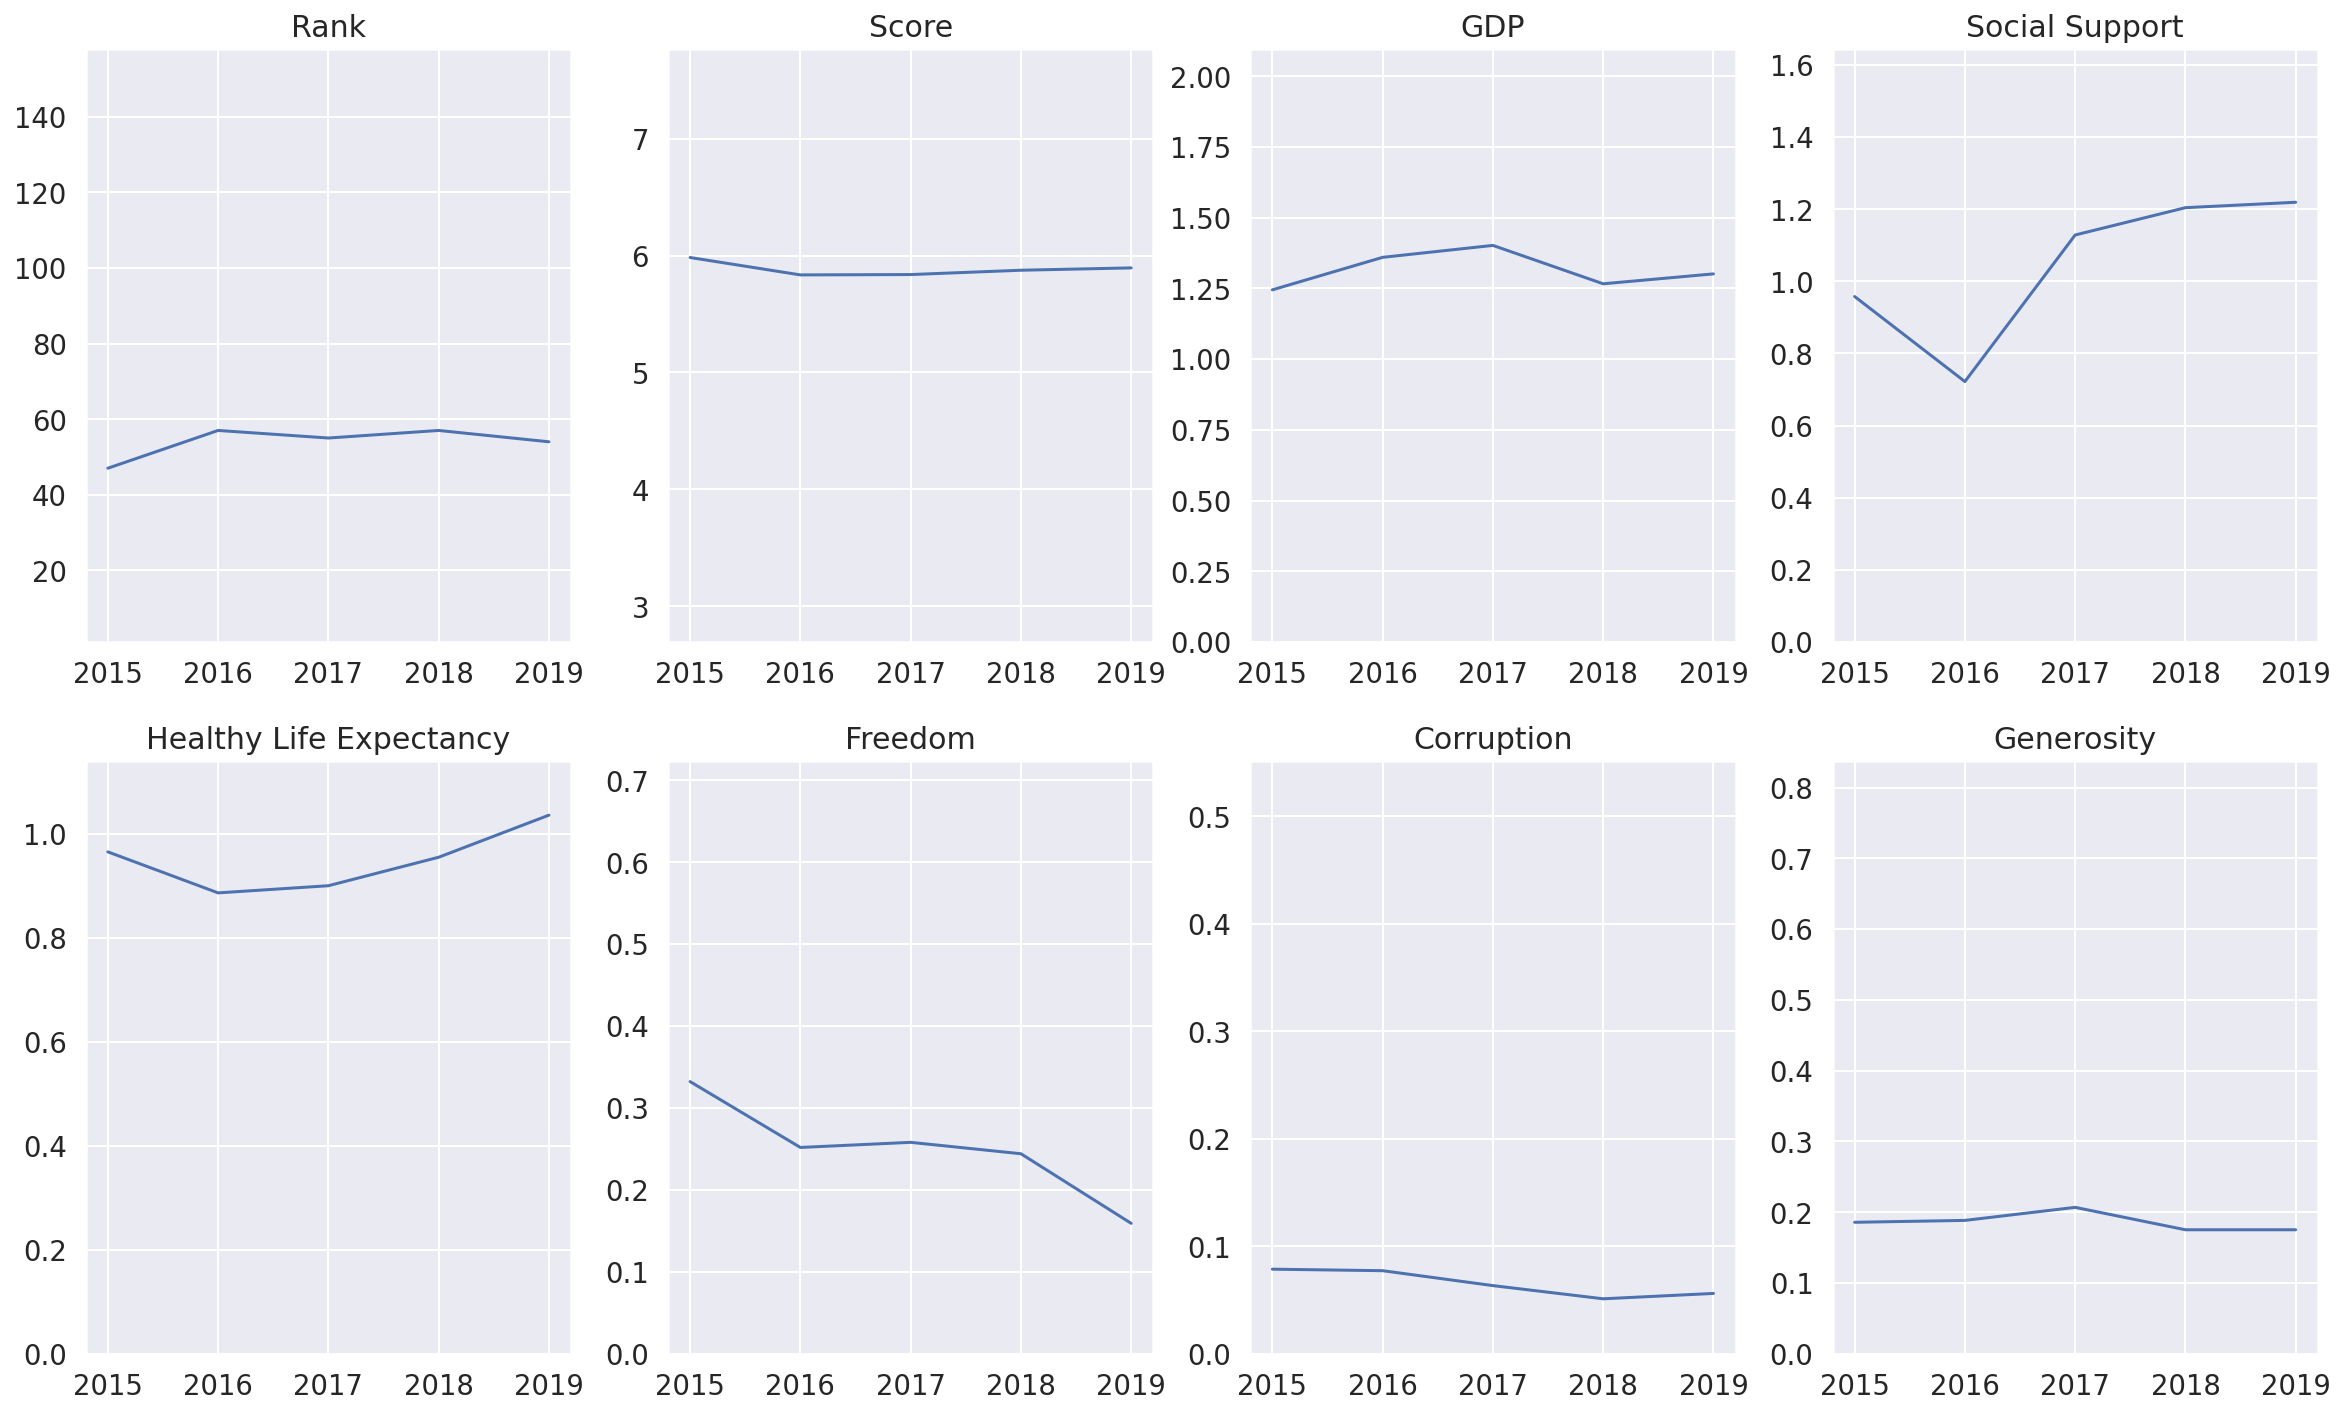

In [167]:
plt.figure(figsize=(20,12))
for iter, feature in enumerate(features):
    plt.subplot(2,4,iter+1)
    plt.plot(korea.Year, korea[feature])
    plt.title(feature)
    ymin = statistics[feature]['min']
    ymax = statistics[feature]['max']
    plt.ylim(ymin, ymax)
plt.show()

세계 점수 분포 확인
- 행복 = 절대평가? or 상대평가?

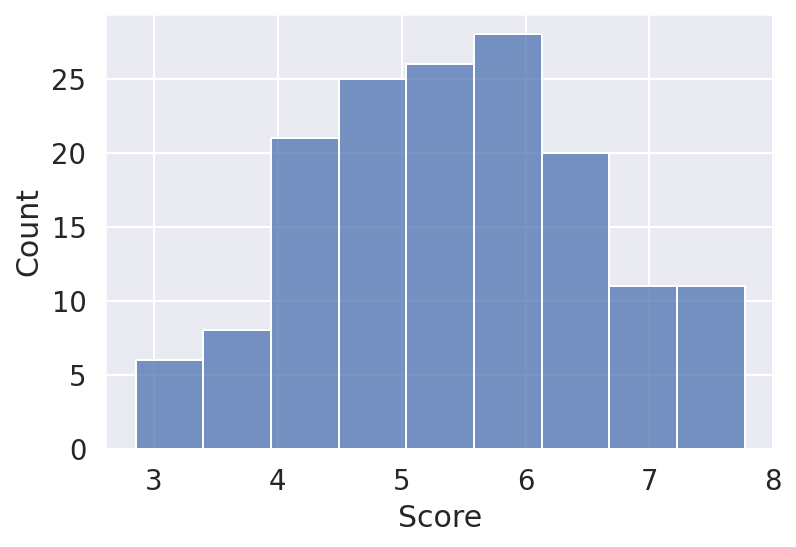

In [169]:
sns.histplot(happiness2019.Score)
plt.show()